In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\hoxto\Desktop\PlayTennis.csv")


In [ ]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
class NaiveBayes:

    def createTables(self, df):

        self.cols = list(df.columns[:-1])

        yes_table = df[df["Play Tennis"] == "Yes"]
        no_table = df[df["Play Tennis"] == "No"]

        self.total = len(df)
        self.yes_count = len(yes_table)
        self.no_count = len(no_table)

        no_output = pd.get_dummies(no_table).sum()
        probabilities = no_output.values[:-1] / no_output.values[-1]
        no_df = pd.DataFrame(probabilities).T
        no_df.columns = no_output.index[:-1]

        yes_output = pd.get_dummies(yes).sum()
        probabilities = yes_output.values[:-1] / yes_output.values[-1]
        yes_df = pd.DataFrame(probabilities).T
        yes_df.columns = yes_output.index[:-1]

        self.yes_df = yes_df
        self.no_df = no_df

    def calculateProbabilities(self, row):

        no_total, yes_total = 1, 1

        for colString, rowString in zip(self.cols, row):
                label = f"{colString}_{rowString}"
                try:
                    no_total *= no_df[label]
                except:
                    no_total *= 0

                try:
                    yes_total *= yes_df[label]
                except:
                    yes_total *= 0

        no_total *= self.no_count/self.total
        yes_total *= self.yes_count/self.total

#         print(f"No: {no_total[0]}, Yes: {yes_total[0]}")
        output = "Yes" if yes_total[0] > no_total[0] else "No"

        return output

    def accuracyTable(self, df):
        predict = [naive.calculateProbabilities(list(row[:-1])) for index, row in df.iterrows()]
        truth = list(df.iloc[:,-1])
        print(classification_report(truth, predict))
        matrix = confusion_matrix(truth,predict)
        graphMatrix = ConfusionMatrixDisplay(confusion_matrix = matrix)
        graphMatrix.plot()
        plt.show()




In [ ]:
naive = NaiveBayes()

In [ ]:
naive.createTables(df)

In [ ]:
naive.yes_df

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0.444444,0.333333,0.222222,0.333333,0.222222,0.444444,0.333333,0.666667,0.333333,0.666667


In [ ]:
naive.no_df

,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0.4,0.6,0.2,0.4,0.4,0.8,0.2,0.6,0.4


In [ ]:
naive.calculateProbabilities(["Overcast", "Hot", "High", "Weak"])

'Yes'

              precision    recall  f1-score   support

          No       1.00      0.80      0.89         5
         Yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



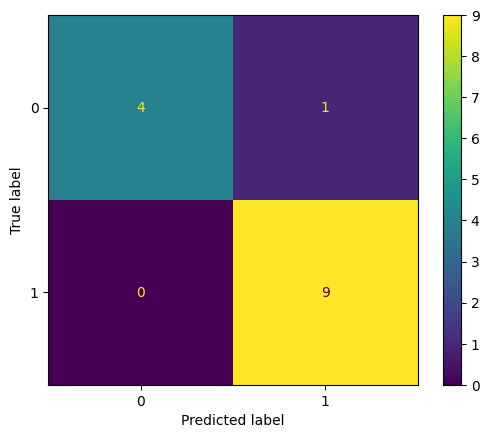

In [ ]:
naive.accuracyTable(df)

In [ ]:
# You and your friend are standing in front of a magician and he has a basket with 6 white,
# 4 red and 5 blue balls, each time the magician draws 3 balls and asks you to predict
# what would be the color of the balls. If you predict correctly the magician loses the
# game and you win. Since you have become a statistician after doing the ML assignment,
# what should be the optimal color scheme of the balls that you would propose in order
# to win the game?

In [ ]:
[]